# NN 모델훈련

## 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import pickle

from freeman.task.trading.config import *
from freeman.utils.support_tf import LogLevelManager as llm
llm.set(2)

## 데이터 불러오기

In [2]:
train_df = pd.read_csv("/home/freeman/projects/data/trading/data/train_5930.csv", sep=",")
test_df = pd.read_csv("/home/freeman/projects/data/trading/data/test_5930.csv", sep=",")
with open(f"/home/freeman/projects/data/trading/temp/max_value.pkl", "rb") as f:
    max_value = pickle.load(f)

## DataFrame to Tensor

In [3]:
train_df_x, train_df_y = train_df.iloc[:, 1:-1].copy(deep=True), train_df.iloc[:, -1:]
test_df_x, test_df_y = test_df.iloc[:, 1:-1].copy(deep=True), test_df.iloc[:, -1:]

In [4]:
train_x = tf.constant(train_df_x.to_numpy(), dtype=tf.float32)
train_y = tf.constant(train_df_y.to_numpy(), dtype=tf.float32)
test_x = tf.constant(test_df_x.to_numpy(), dtype=tf.float32)
test_y = tf.constant(test_df_y.to_numpy(), dtype=tf.float32)

## NN 모델 정의

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=32, activation="relu", input_shape=train_x.shape[1:]),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=1)
])
model.compile(optimizer="adam",
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [6]:
%%time
model.fit(train_x, train_y, epochs=1000, batch_size=128)

Epoch 1/1000
8/8 [==============================] - 2s 8ms/step - loss: 0.0127 - mean_absolute_error: 0.0898
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0551
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0443
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0344
Epoch 5/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0300
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0014 - mean_absolute_error: 0.0294
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0278
Epoch 8/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0260
Epoch 9/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0010 - mean_absolute_error: 0.0254
Epoch 10/1000
8/8 [

## 모델 시험

In [7]:
pred_y = model.predict(test_x)

In [9]:
for p, r in zip(pred_y, test_y):
    print(f"예측: {int(p[0]*max_value['close'])}, 실제: {int(r[0]*max_value['close'])}")

예측: 65741, 실제: 66500
예측: 67615, 실제: 66300
예측: 67824, 실제: 67600
예측: 69142, 실제: 68100
예측: 68036, 실제: 67500
예측: 68979, 실제: 68000
예측: 68997, 실제: 67900
예측: 70134, 실제: 66500
예측: 67044, 실제: 66400
예측: 67703, 실제: 65900
예측: 66716, 실제: 66500
예측: 68061, 실제: 67400
예측: 67852, 실제: 66700
예측: 67414, 실제: 66800
예측: 67416, 실제: 65500
예측: 66230, 실제: 65300
예측: 66180, 실제: 65200
예측: 65752, 실제: 63800
예측: 62344, 실제: 62100
예측: 64066, 실제: 61900
예측: 62552, 실제: 60700
예측: 61455, 실제: 60900
예측: 60541, 실제: 59800
예측: 59200, 실제: 58500
예측: 59163, 실제: 57600
예측: 59811, 실제: 57400
예측: 57833, 실제: 58400
예측: 59661, 실제: 58800
예측: 59715, 실제: 59400
예측: 59453, 실제: 58000
예측: 59392, 실제: 57000
예측: 60336, 실제: 56200
예측: 57802, 실제: 57200
예측: 57179, 실제: 56400
예측: 58157, 실제: 58200
예측: 59438, 실제: 58700
예측: 60395, 실제: 58800
예측: 59232, 실제: 58100
예측: 59841, 실제: 58000
예측: 58937, 실제: 57500
예측: 58259, 실제: 60000
예측: 63094, 실제: 61900
예측: 62302, 실제: 60900
예측: 62113, 실제: 60500
예측: 61655, 실제: 61800
예측: 63841, 실제: 61300
예측: 62429, 실제: 61100
예측: 61801, 실제

### 시각화

In [10]:
pred_yy = pred_y * max_value["close"]
pred_yy = np.squeeze(pred_yy, axis=1)
test_yy = np.squeeze(test_y*max_value['close'], axis=1)

In [11]:
pred_df = pd.DataFrame()
pred_df['real'] = test_yy
pred_df["pred"] = pred_yy

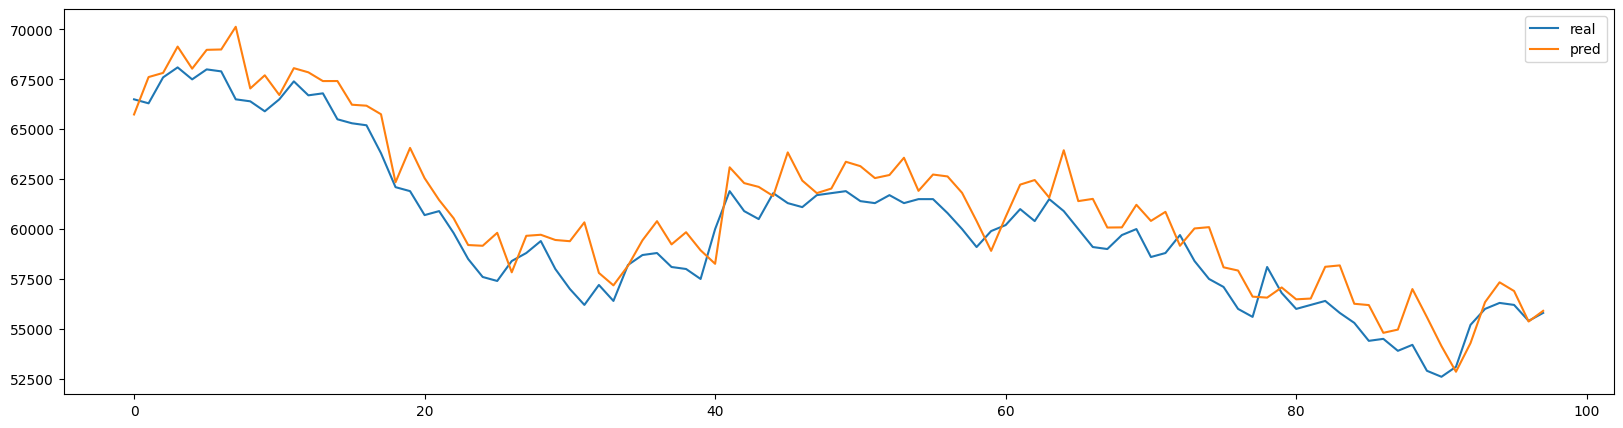

In [14]:
# pred_df.iloc[:-50, :].plot(figsize=(20,5))
pred_df.iloc[:-1, :].plot(figsize=(20,5))
plt.show()